## **My Dashboard Data Wrangling**

In [2]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported successful")

Imported successful


In [3]:
# Loading in the dataset
sales_data = pd.read_excel("eletronic_sales.xlsx")

In [4]:
#  Snapshot of the dataset
sales_data.head()

,Date,Branch,Sales Agent,Products,Units,Price
0,2014-09-01,Woji,Chinedu,Apple,2,125.00
1,2015-06-17,Woji,Emeka,Apple,5,125.00
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29
3,2015-11-17,Woji,Tolu,HP,11,4.99
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29


In [5]:
#  Little of Feature Engineering

# Trying to make a copy of the dataset and work on it
sales_data2 = sales_data.copy()

# sales_data2["Revenue"] = sales_data2["Units"] * sales_data2["Price"]

#  round(parameter, 2)
sales_data2["Revenue(N)"] = round(sales_data2["Units"]*sales_data2["Price"] * 1000, 2)

# This is to view if the changes has been effected
sales_data2.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue(N)
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0
3,2015-11-17,Woji,Tolu,HP,11,4.99,54890.0
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18060.0


In [6]:
# Let's check data types
sales_data2.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
Revenue(N)            float64
dtype: object

In [7]:
#  Converting the date column to date time
# By using "pd.to_datetime()" function

# Note: we only do this when trying to convert it to datetime if not there earlier
sales_data2["Date"] = pd.to_datetime(sales_data2["Date"])

In [8]:
sales_data2.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
Revenue(N)            float64
dtype: object

<Axes: xlabel='Data Types', ylabel='Count'>

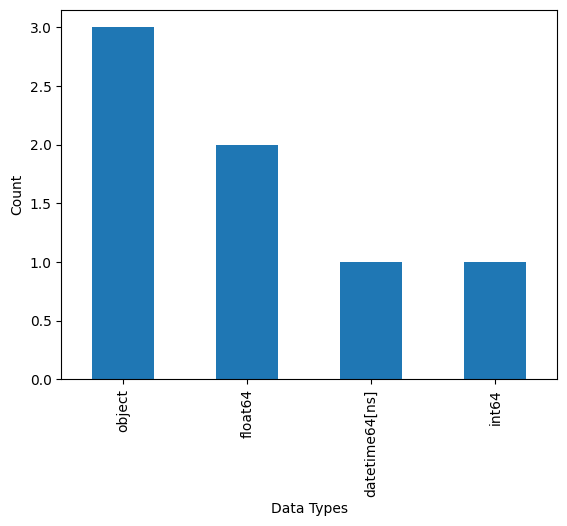

In [9]:
# Trying to plot the datatype.
sales_data2.dtypes.value_counts().plot(kind='bar', xlabel = "Data Types", ylabel = "Count")

In [10]:
# lets  work on our datetime to extract the month,year and week name
# using ".dt.year",".dt.month_name()",".day_name()

sales_data2["Year"] = sales_data2["Date"].dt.year
sales_data2["Month"] = sales_data2["Date"].dt.month_name()
sales_data2["Week"] = sales_data2["Date"].dt.day_name()

In [11]:
sales_data2.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue(N),Year,Month,Week
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0,2014,September,Monday
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0,2015,June,Wednesday
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0,2015,September,Thursday
3,2015-11-17,Woji,Tolu,HP,11,4.99,54890.0,2015,November,Tuesday
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18060.0,2015,October,Saturday


### **Working on the KPI's (Key Performance index of the data)**
1. Total units sold
2. Total Revenue
3. Average Revenue per unit
4. Numbers of products
5. Numbers of Sales Agents

In [12]:
# Total Units sold

Total_goods_sold = sales_data2["Units"].sum()
print(f"Total goods sold: {Total_goods_sold} units")

Total goods sold: 2121 units


In [13]:
# Total Revenue
Total_Revenue = sales_data2["Revenue(N)"].sum()
print(f"Total Revenue: N{Total_Revenue}")

Total Revenue: N19627880.0


In [14]:
#  Average Revenue per unit
# using "round() function to approximate to 2 decimal place"
Average_revenue_per_unit = round(Total_Revenue / Total_goods_sold,2)
print(f"Average Revenue per unit: N{Average_revenue_per_unit}")

Average Revenue per unit: N9254.07


In [15]:
#4. Numbers of products
## using the .nunique() shows the numbers of unique values
Numbers_of_products = sales_data2["Products"].nunique()
print(f"Numbers of products: {Numbers_of_products}")

Numbers of products: 5


In [16]:
# Numbers of Sales Agents
Numbers_of_sales_agents = sales_data2["Sales Agent"].nunique()
print(f"Numbers of Sales Agents: {Numbers_of_sales_agents}")

Numbers of Sales Agents: 11


### **Working on the insights by creating models and plotting their charts**

In [17]:
#  Set index using the date column
sales_data2.set_index("Date", inplace= True)

# Don't run this twice. Else, it will throw error.

In [18]:
sales_data2.head()

,Branch,Sales Agent,Products,Units,Price,Revenue(N),Year,Month,Week
Date,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0,2014,September,Monday
2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18060.0,2015,October,Saturday


#### Class Task1: Calculate the Total Monthly revenue for year 2015 and plot the chart using 3 visualization packages in python

In [19]:
sales_data2.Year.unique()

array([2014, 2015], dtype=int32)

In [20]:
#  sales_2015 = sales_data2[sales_data2["Year"] == 2015]

In [21]:
#  Monthly Revenue in 2015
# Filtering for 2015

sales_2015 = sales_data2[sales_data2["Year"] == 2015]
sales_2015.head(3)

,Branch,Sales Agent,Products,Units,Price,Revenue(N),Year,Month,Week
Date,,,,,,,,,
2015-06-17,Woji,Emeka,Apple,5,125.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54890.0,2015,November,Tuesday


In [22]:
# I am using the .sort_index() to arrange the output, so the arrangement is done base on the index
Total_monthly_revenue = sales_2015.groupby("Month")["Revenue(N)"].sum().sort_index()
Total_monthly_revenue

Month
April         610380.0
August       1830900.0
December     2018780.0
February     1324960.0
January       413540.0
July          996330.0
June          625000.0
March         389430.0
May           787570.0
November       54890.0
October      1157490.0
September     160270.0
Name: Revenue(N), dtype: float64

In [23]:
# I am using the .sort_values() to arrange the output, so the arrangement is done base on the values

Total_monthly_revenue = sales_2015.groupby("Month")["Revenue(N)"].sum().sort_values(ascending = False)
Total_monthly_revenue

Month
December     2018780.0
August       1830900.0
February     1324960.0
October      1157490.0
July          996330.0
May           787570.0
June          625000.0
April         610380.0
January       413540.0
March         389430.0
September     160270.0
November       54890.0
Name: Revenue(N), dtype: float64

<Axes: title={'center': 'Monthly Revenue for 2015'}, xlabel='Month', ylabel='Revenue(N)'>

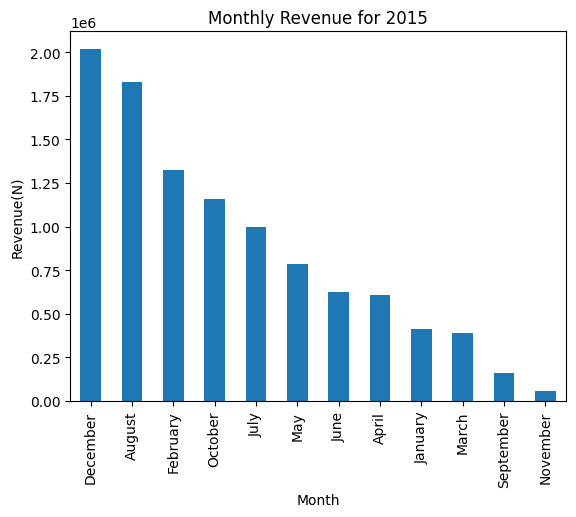

In [24]:
# lets put this in a plot using pandas
Total_monthly_revenue.plot(kind = "bar",xlabel = "Month", ylabel ="Revenue(N)", title= "Monthly Revenue for 2015")

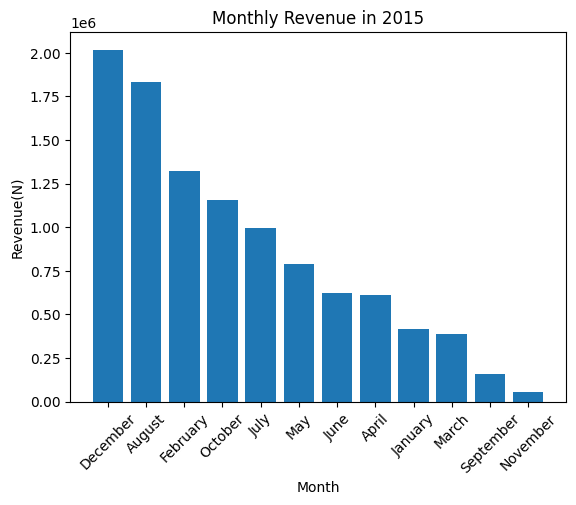

In [25]:
# lets use matlplotlib
plt.bar(Total_monthly_revenue.index, Total_monthly_revenue.values)
plt.xlabel("Month")
plt.ylabel("Revenue(N)")
plt.title("Monthly Revenue in 2015")
plt.xticks(rotation = 45)
plt.show()

In [26]:
#  Third visualization is Seaborn but not taught yet

### Student Task1: Follow the same step and calculate the monthly revenue for 2014 and plot that charts using the 3 visualization packages in python.

In [27]:
sales_2014 = sales_data2[sales_data2["Year"] == 2014]

# Call out the filtering for 2014
sales_2014.head(3)

,Branch,Sales Agent,Products,Units,Price,Revenue(N),Year,Month,Week
Date,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250000.0,2014,September,Monday
2014-02-26,Woji,Ibrahim,Compaq,27,19.99,539730.0,2014,February,Wednesday
2014-10-05,Woji,George,HP,28,8.99,251720.0,2014,October,Sunday


In [28]:
Total_monthly_revenue2 = sales_2014.groupby("Month")["Revenue(N)"].sum().sort_index() 
print(f"Total monthly revenue for 2014 according to index :\n {Total_monthly_revenue2}")

Total monthly revenue for 2014 according to index :
 Month
April         448650.0
August        174650.0
December     1269690.0
February      719370.0
January      1188550.0
July         1676900.0
June          988500.0
March         167440.0
May           512780.0
November      778890.0
October       827080.0
September     505840.0
Name: Revenue(N), dtype: float64


In [29]:
Total_monthly_revenue2 = sales_2014.groupby("Month")["Revenue(N)"].sum().sort_values()
print(f"Total monthly revenue for 2014 according to Sorted Values:\n {Total_monthly_revenue2}")

Total monthly revenue for 2014 according to Sorted Values:
 Month
March         167440.0
August        174650.0
April         448650.0
September     505840.0
May           512780.0
February      719370.0
November      778890.0
October       827080.0
June          988500.0
January      1188550.0
December     1269690.0
July         1676900.0
Name: Revenue(N), dtype: float64


<Axes: title={'center': 'Monthly Revenue for 2014'}, xlabel='Month', ylabel='Revenue(N)'>

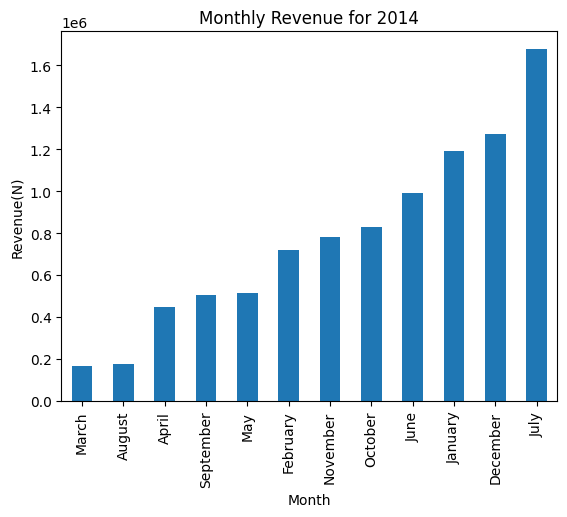

In [30]:
# Plotting using pandas
Total_monthly_revenue2.plot(kind= "bar", xlabel= "Month", ylabel= "Revenue(N)", title= "Monthly Revenue for 2014")

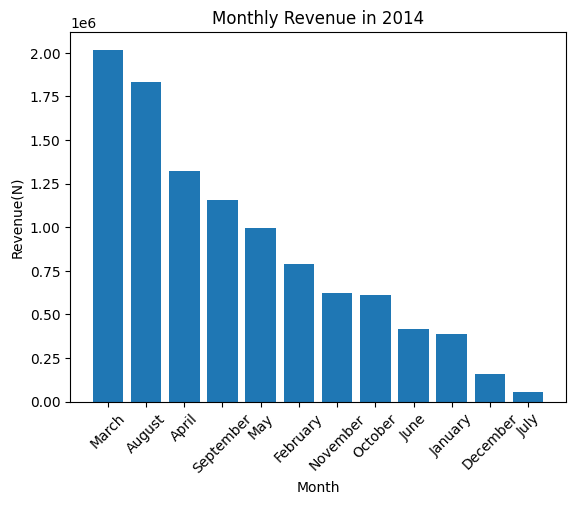

In [31]:
#  Plotting using matplotlib
plt.bar(Total_monthly_revenue2.index, Total_monthly_revenue.values)
plt.xlabel("Month")
plt.ylabel("Revenue(N)")
plt.title("Monthly Revenue in 2014")
plt.xticks(rotation = 45)
plt.show()

In [32]:
# Total revenue by branch
# Lest check the branches we have first
sales_data2["Branch"].unique()

array(['Woji', 'GRA', 'Town'], dtype=object)

In [33]:
Total_revenue_by_branch = sales_data2.groupby("Branch")["Revenue(N)"].sum().sort_values(ascending= False)
Total_revenue_by_branch

Branch
Woji    11139070.0
GRA      6002090.0
Town     2486720.0
Name: Revenue(N), dtype: float64

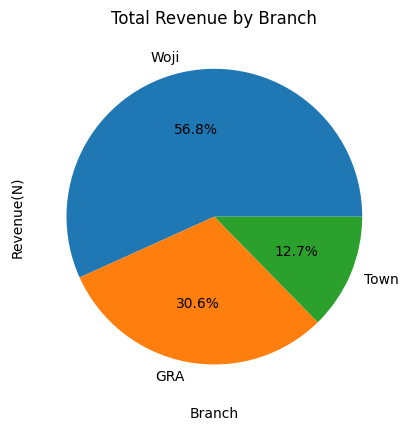

In [34]:
#  Plot the chart for Total Revenue by branch using matplotlib
plt.pie(Total_revenue_by_branch.values, labels=Total_revenue_by_branch.index, autopct= '%1.1f%%')
plt.xlabel("Branch")
plt.ylabel("Revenue(N)")
plt.title("Total Revenue by Branch")
plt.show()

In [35]:
#Total revenue by products
## lets check the products available first
sales_data2["Products"].unique()

array(['Apple', 'Lenovo', 'HP', 'Compaq', 'Dell'], dtype=object)

In [36]:
Total_revenue_by_product = sales_data2.groupby("Products")["Revenue(N)"].sum().sort_values(ascending = False)
Total_revenue_by_product

Products
HP        9577650.0
Dell      4169870.0
Lenovo    2135140.0
Compaq    2045220.0
Apple     1700000.0
Name: Revenue(N), dtype: float64

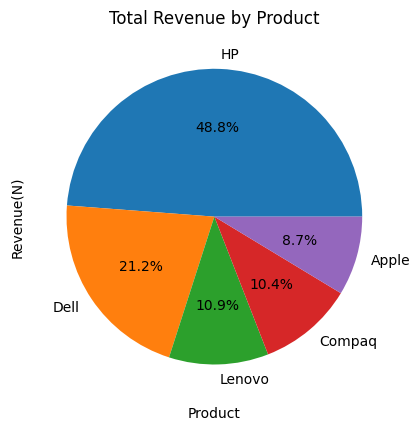

In [37]:
# LEts plot
plt.pie(Total_revenue_by_product.values, labels=Total_revenue_by_product.index, autopct='%1.1f%%')
plt.xlabel("Product")
plt.ylabel("Revenue(N)")
plt.title("Total Revenue by Product")
plt.show()

In [38]:
#3. Total revenue by sales agent

#Lets check who our sales agents are
sales_data2["Sales Agent"].unique()

array(['Chinedu', 'Emeka', 'Ibrahim', 'Tolu', 'Tonye', 'George',
       'Blessing', 'Chioma', 'Torbari', 'Uche', 'Tunde'], dtype=object)

In [39]:
Total_revenue_by_sales_agent = sales_data2.groupby("Sales Agent")["Revenue(N)"].sum().sort_values(ascending = False)
Total_revenue_by_sales_agent

Sales Agent
Emeka       3109440.0
Chioma      3102300.0
Tolu        2812190.0
Blessing    2363040.0
Ibrahim     1749870.0
Chinedu     1641430.0
George      1387770.0
Uche        1283610.0
Tunde       1203110.0
Torbari      536750.0
Tonye        438370.0
Name: Revenue(N), dtype: float64

<Axes: ylabel='Sales Agent'>

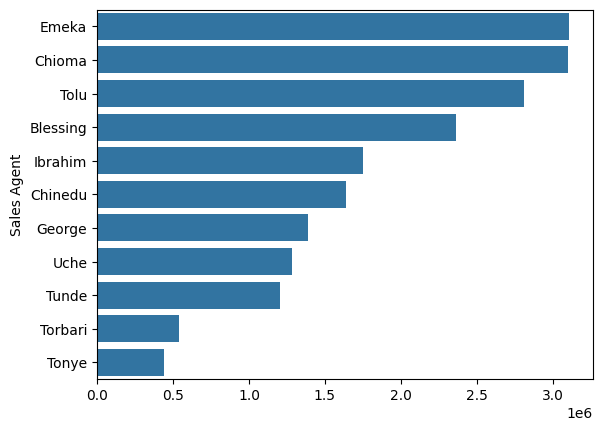

In [40]:
# lets plot using seaborn barchart
sns.barplot(x = Total_revenue_by_sales_agent.values, y = Total_revenue_by_sales_agent.index, orient = "h")

In [41]:
#4. Total revenue by week
Total_revenue_by_week = sales_data2.groupby("Week")["Revenue(N)"].sum().sort_values(ascending = False)
Total_revenue_by_week

Week
Monday       3515170.0
Friday       3426630.0
Tuesday      3388970.0
Wednesday    3348580.0
Sunday       3146200.0
Thursday     1809960.0
Saturday      992370.0
Name: Revenue(N), dtype: float64

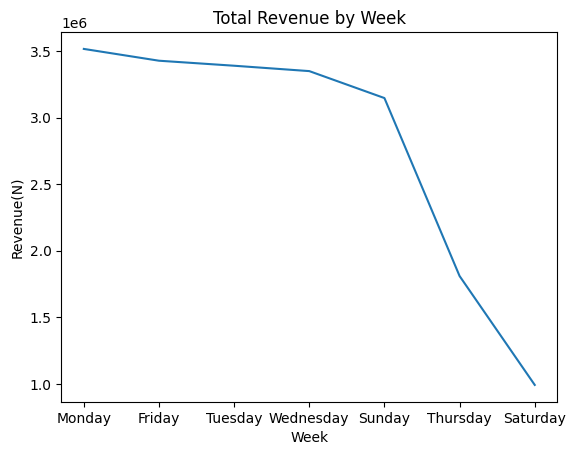

In [42]:
# Plotting the above using line chart
plt.plot(Total_revenue_by_week.index, Total_revenue_by_week.values)
plt.xlabel("Week")
plt.ylabel("Revenue(N)")
plt.title("Total Revenue by Week")
plt.show()

In [46]:
# Total revenue by month
Total_revenue_by_month = sales_data2.groupby("Month")["Revenue(N)"].sum().sort_values(ascending= False)
Total_revenue_by_month

Month
December     3288470.0
July         2673230.0
February     2044330.0
August       2005550.0
October      1984570.0
June         1613500.0
January      1602090.0
May          1300350.0
April        1059030.0
November      833780.0
September     666110.0
March         556870.0
Name: Revenue(N), dtype: float64

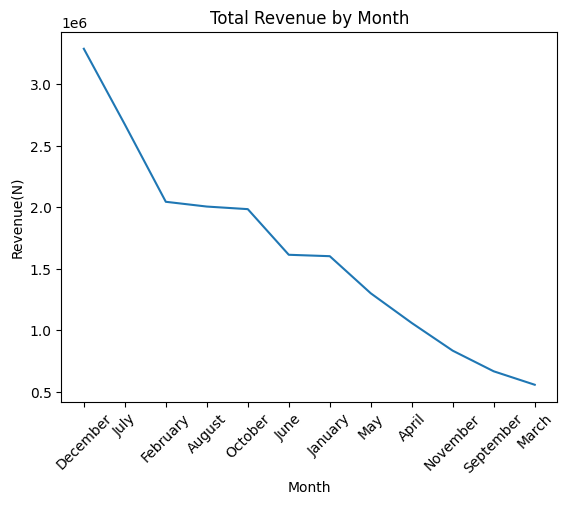

In [56]:
# Plot using seaborn for line chart
sns.lineplot(x = Total_revenue_by_month.index, y = Total_revenue_by_month.values)
plt.xlabel("Month")
plt.xticks(rotation = 45)
plt.ylabel("Revenue(N)")
plt.title("Total Revenue by Month")
plt.show()

In [57]:
# Trends of Sales
Trends_of_sales_over_the_year = sales_data2.groupby(["Year", "Month"])["Revenue(N)"].sum().reset_index()
Trends_of_sales_over_the_year

,Year,Month,Revenue(N)
0,2014,April,448650.0
1,2014,August,174650.0
2,2014,December,1269690.0
3,2014,February,719370.0
4,2014,January,1188550.0
5,2014,July,1676900.0
6,2014,June,988500.0
7,2014,March,167440.0
8,2014,May,512780.0
9,2014,November,778890.0


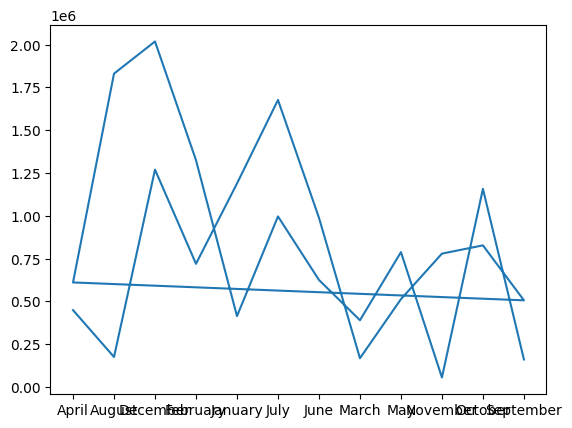

In [58]:
# lets plot
plt.plot(Trends_of_sales_over_the_year["Month"], Trends_of_sales_over_the_year["Revenue(N)"])